Data Types of Each Feature:
pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Summary of the Dataset:
             pclass     survived                  name   sex          age  \
count   1309.000000  1309.000000                  1309  1309  1046.000000   
unique          NaN          NaN                  1307     2          NaN   
top             NaN          NaN  Connolly, Miss. Kate  male          NaN   
freq            NaN          NaN                     2   843          NaN   
mean       2.294882     0.381971                   NaN   NaN    29.881135   
std        0.837836     0.486055                   NaN   NaN    14.413500   
min        1.000000     0.000000                   NaN   NaN     0.166700   
25%        2.000000    

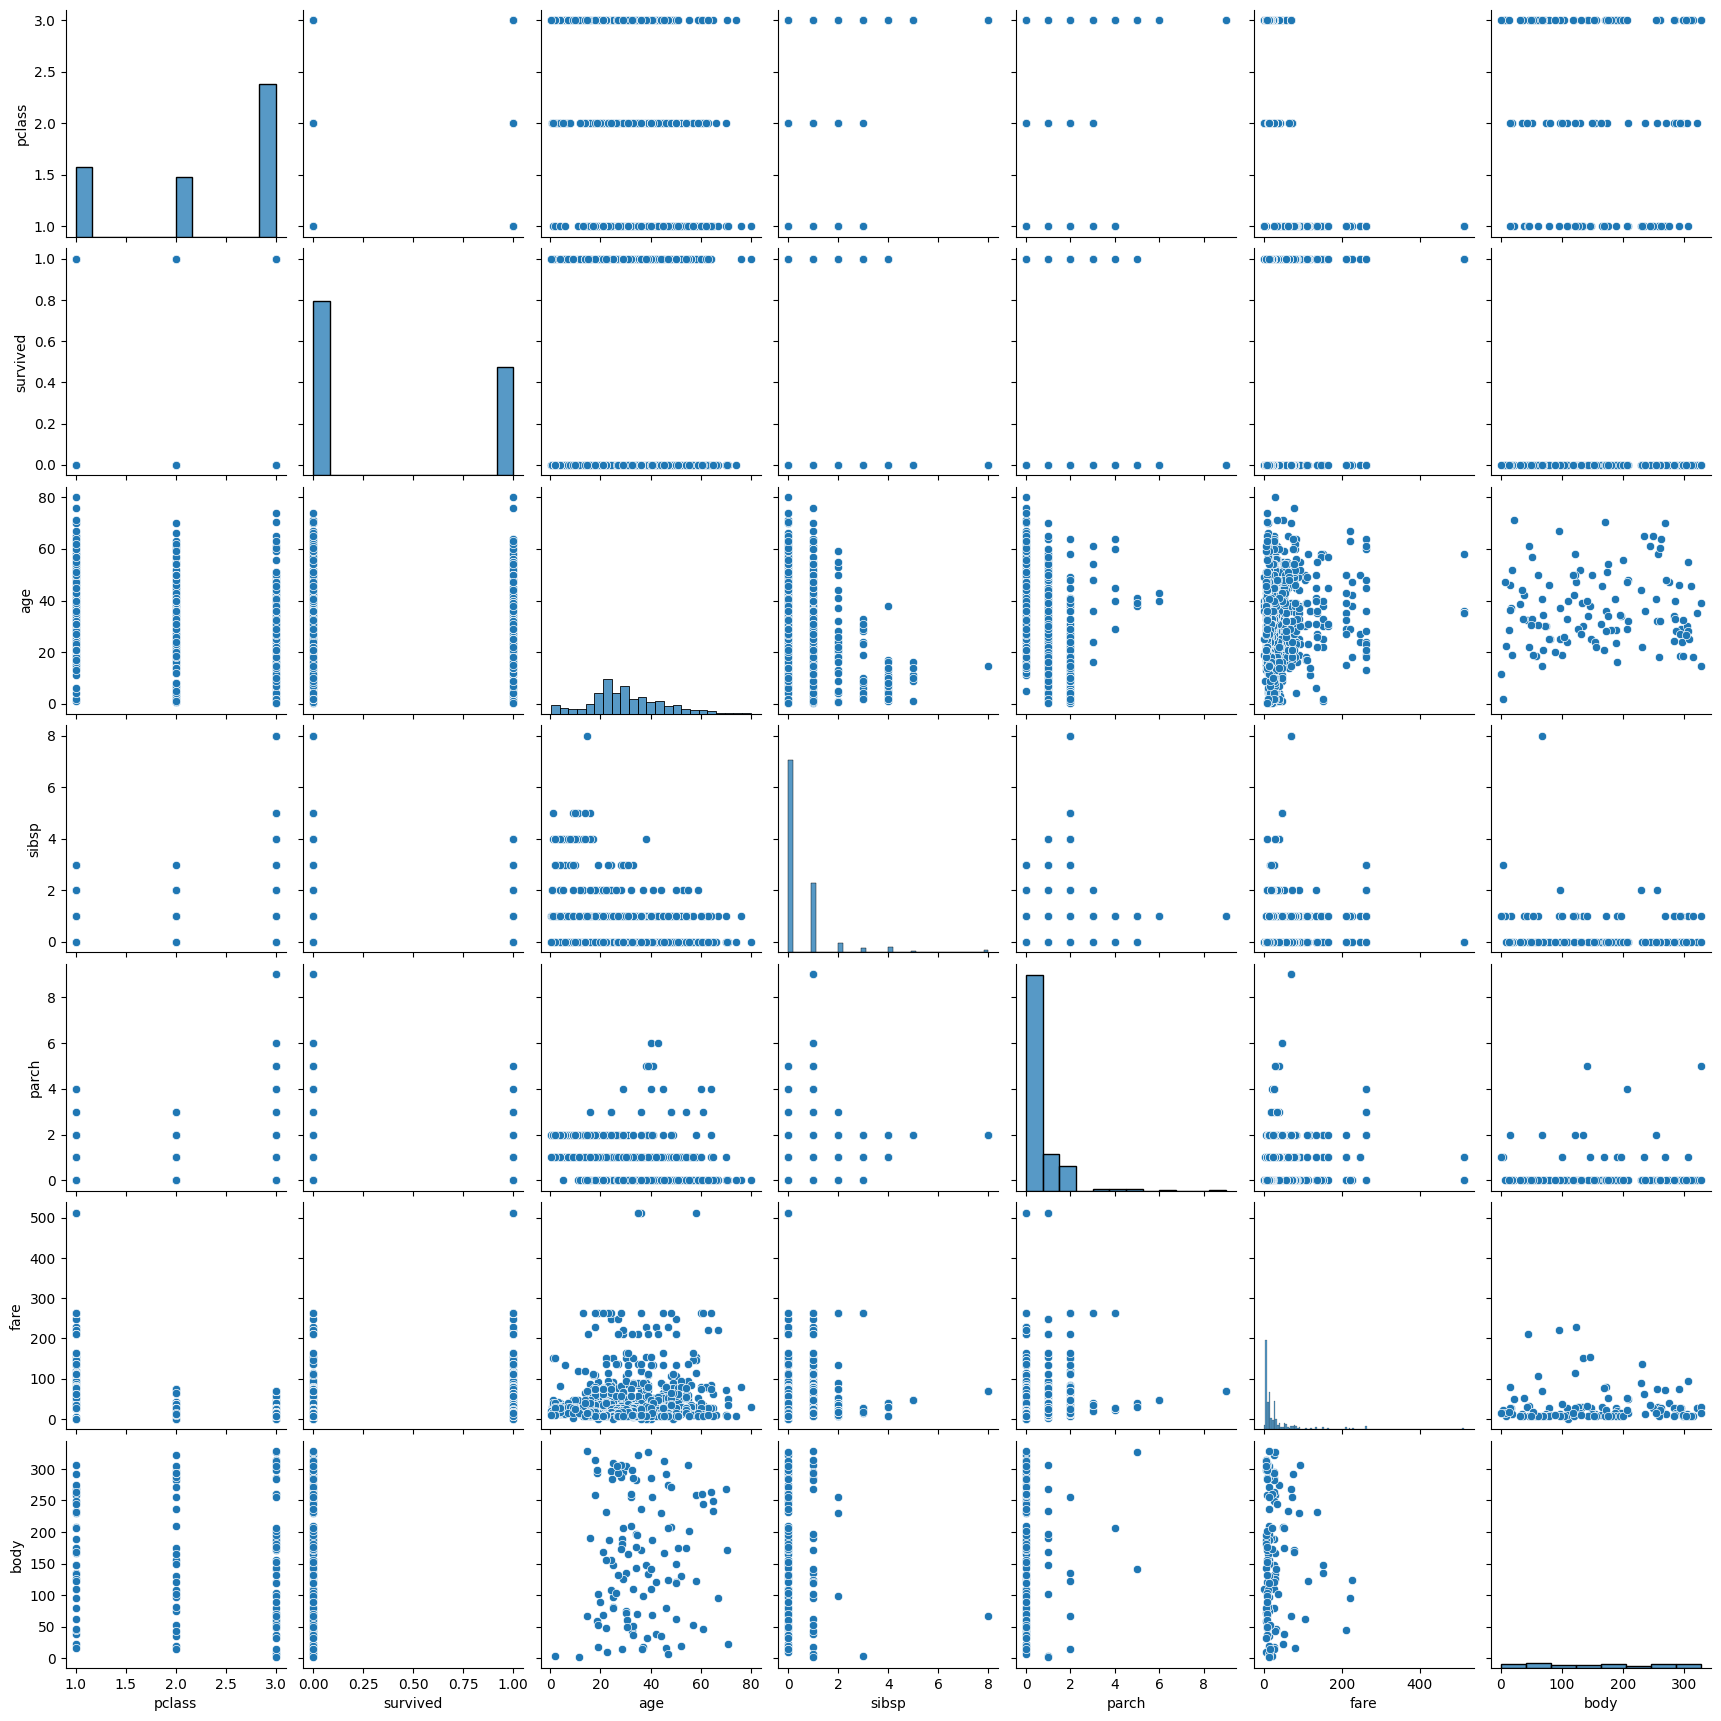

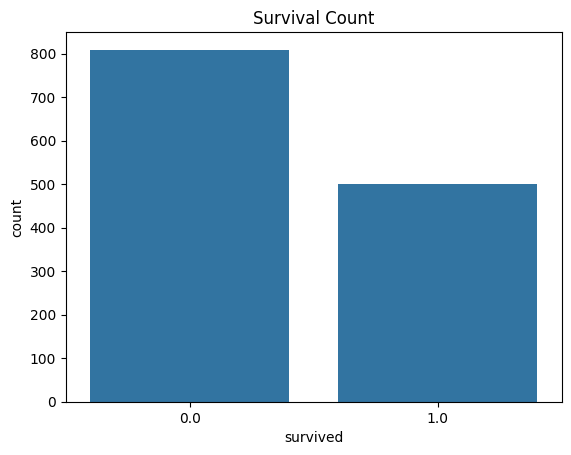

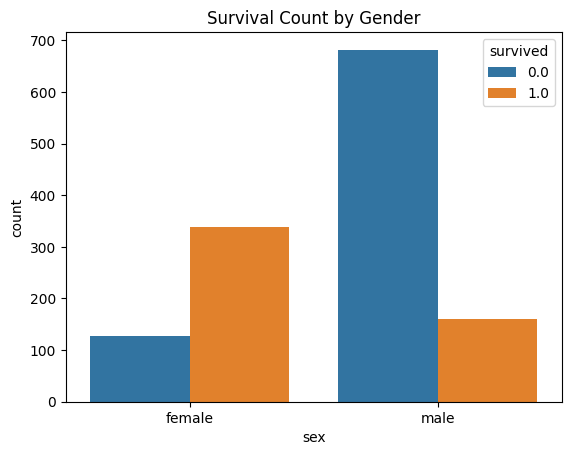

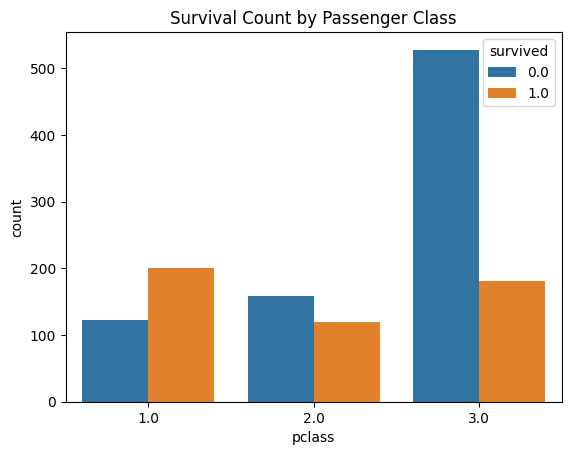


Class-wise Survival Rate:
pclass
1.0    0.619195
2.0    0.429603
3.0    0.255289
Name: survived, dtype: float64


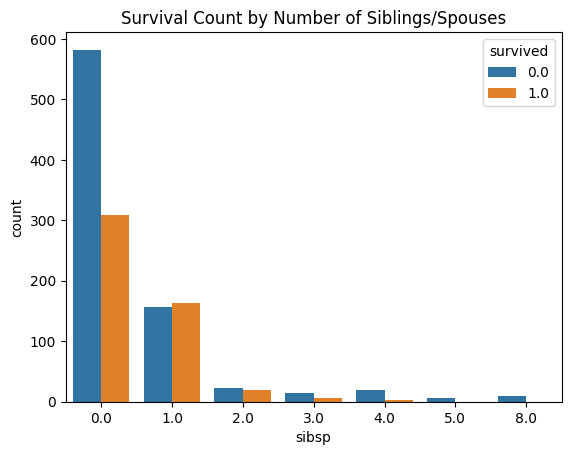

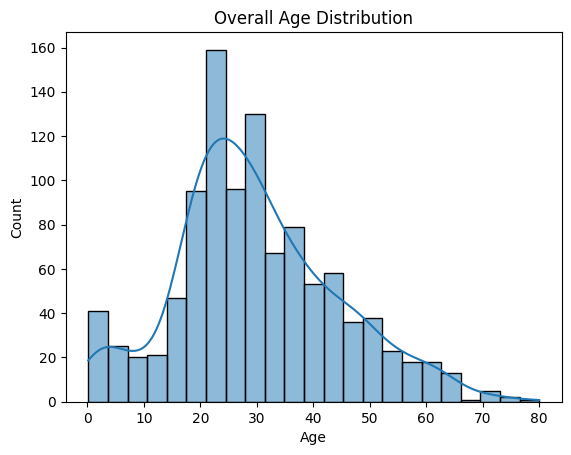

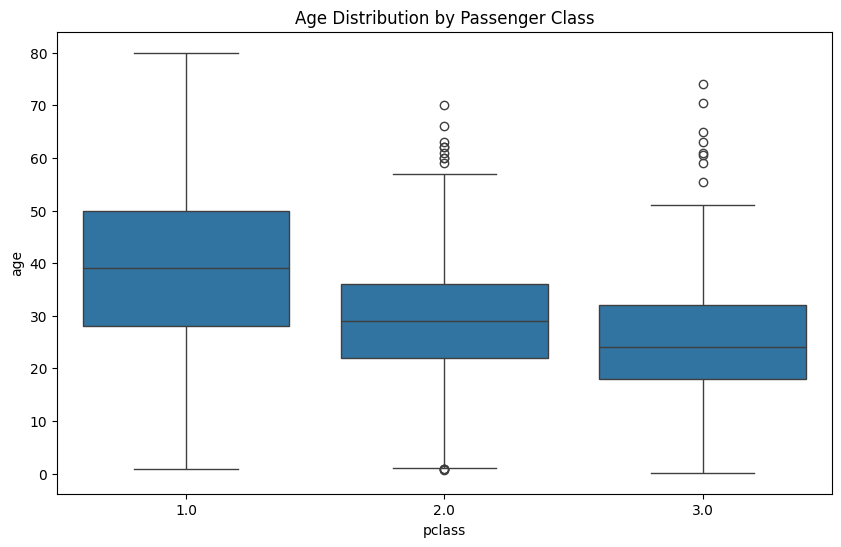


Updated DataFrame:
   pclass  survived                                             name  sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  1.0   
1     1.0       1.0                   Allison, Master. Hudson Trevor  0.0   
2     1.0       0.0                     Allison, Miss. Helen Loraine  1.0   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton  0.0   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  1.0   

       age  sibsp  parch  ticket      fare    cabin boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26  NaN    NaN   

                         home.dest  embarked_C  embarked_Q  embarked_S  
0                     St Louis, MO       

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/titanic.csv")

print("Data Types of Each Feature:")
print(df.dtypes)
print("\nSummary of the Dataset:")
print(df.describe(include='all'))

# Step 4: List the names of columns/features in the dataset
print("\nColumn Names:")
print(df.columns)

# Step 5: Perform Exploratory analysis
# Plot numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[numeric_features])
plt.show()

# Check relative size of survived/unsurvived
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

# Check if any pattern on gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Gender')
plt.show()
# Passenger class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


# Class-wise survival rate
class_survival_rate = df.groupby('pclass')['survived'].mean()
print("\nClass-wise Survival Rate:")
print(class_survival_rate)

# Siblings
sns.countplot(x='sibsp', hue='survived', data=df)
plt.title('Survival Count by Number of Siblings/Spouses')
plt.show()

# Overall age distribution
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Overall Age Distribution')
plt.xlabel('Age')
plt.show()

# Class-wise age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

# Step 6: Data wrangling
# Impute age data
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

# Drop unnecessary features
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
existing_columns = df.columns

columns_to_drop = [col for col in columns_to_drop if col in existing_columns]
 # Remove columns not present in the DataFrame
df.drop(columns=columns_to_drop, axis=1, inplace=True)


# Recode categorical features
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked'])

# Display the updated dataframe
print("\nUpdated DataFrame:")
print(df.head())


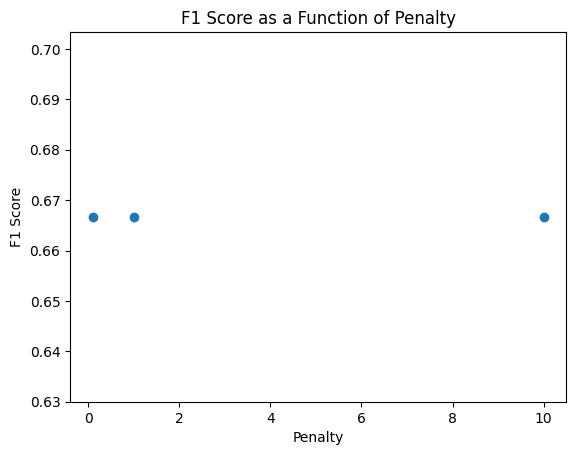

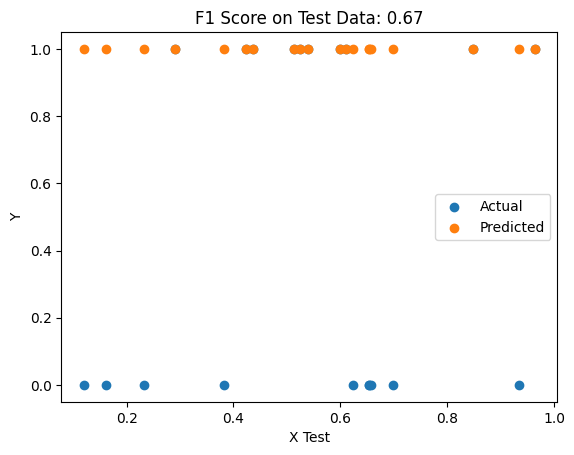

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Step 1: Split the data
X = np.random.rand(100, 1)  # Example X data
Y = np.random.randint(0, 2, 100)  # Example Y data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Apply logistic regression model
logistic_model = LogisticRegression()

# Step 3: Fit the data to the model
logistic_model.fit(X_train, Y_train)

# Step 4: Compute F1 score and plot
penalties = [0.1, 1, 10]  # Example penalties
f1_scores = []
for penalty in penalties:
    model = LogisticRegression(penalty='l2', C=1/penalty)  # Using L2 penalty
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    f1 = f1_score(Y_test, Y_pred)
    f1_scores.append(f1)

# Plot F1 score as a function of penalty
plt.scatter(penalties, f1_scores)
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score as a Function of Penalty')
plt.show()

# Plot F1 score as a function of test data
Y_pred_test = logistic_model.predict(X_test)
f1_test = f1_score(Y_test, Y_pred_test)
plt.scatter(X_test, Y_test, label='Actual')
plt.scatter(X_test, Y_pred_test, label='Predicted')
plt.xlabel('X Test')
plt.ylabel('Y')
plt.title(f'F1 Score on Test Data: {f1_test:.2f}')
plt.legend()
plt.show()
